In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
def retrieve_stock_data(stock_symbol, start_date, end_date):
    data = yf.download(stock_symbol, start = start_date, end = end_date)
    return data

In [4]:
stock_data = retrieve_stock_data("AAPL", "2020-01-01", "2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [5]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167610,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742661,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565186,132079200


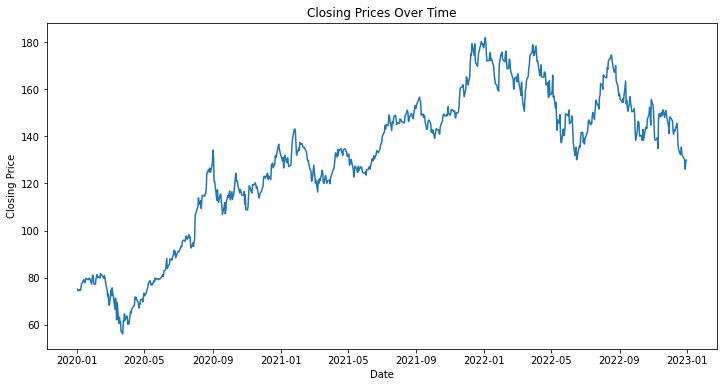

In [7]:
plt.figure(figsize=(12,6))
plt.plot(stock_data["Close"])
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

In [14]:
train_size = int(len(stock_data) * 0.8)
train_data, test_data = stock_data[:train_size], stock_data[train_size:]

In [15]:
train_data = train_data["Close"]
test_data = test_data["Close"]

In [17]:
def find_best_arima_order(data, p_values, d_values, q_values):
    best_score, best_order = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    model = ARIMA(data, order=order)
                    model_fit = model.fit()
                    score = model_fit.aic
                    if score < best_score:
                        best_score, best_order = score, order
                except:
                    continue
    return best_order

In [18]:
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)

In [20]:
best_cfg = find_best_arima_order(train_data, p_values, d_values, q_values)
print("Best ARIMA parameters: ARIMA{}".format(best_cfg))

c:\Users\alche\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alche\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alche\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alche\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been pro

Best ARIMA parameters: ARIMA(0, 1, 1)


In [21]:
model = ARIMA(train_data, order = best_cfg)
model_fit = model.fit()

c:\Users\alche\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alche\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alche\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
forecasted_values = model_fit.forecast(steps = len(test_data))

c:\Users\alche\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\alche\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [25]:
mse = mean_squared_error(test_data, forecasted_values)
print("Mean Squared Error (MSE): {:.2f}".format(mse))

Mean Squared Error (MSE): 175.97


In [26]:
forecasted_values = model_fit.forecast(steps=180)

c:\Users\alche\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\alche\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [27]:
forecast_dates = pd.date_range(start = test_data.index[-1], periods = 180, freq = "D")

In [29]:
forecast_df = pd.DataFrame({"Date": forecast_dates, "Forecasted": forecasted_values})

In [30]:
forecast_df.head()

,Date,Forecasted
604,2022-12-30,140.544034
605,2022-12-31,140.544034
606,2023-01-01,140.544034
607,2023-01-02,140.544034
608,2023-01-03,140.544034


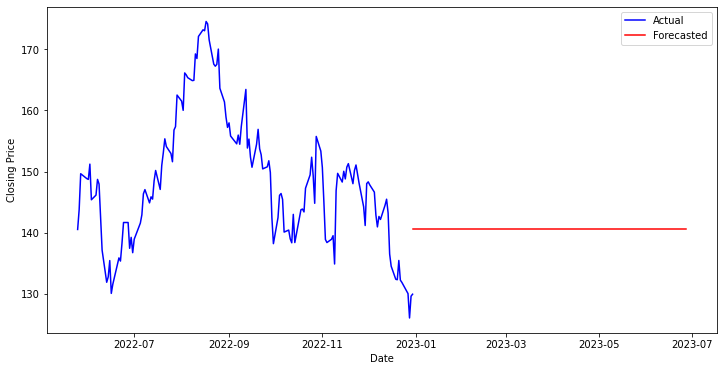

In [34]:
plt.figure(figsize = (12,6))
plt.plot(test_data.index, test_data, label = "Actual", color = "b")
plt.plot(forecast_df["Date"], forecast_df["Forecasted"], label = "Forecasted", color = "r")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()